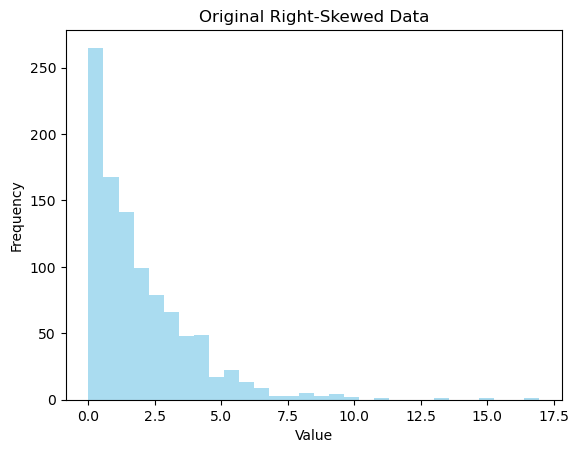

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generating right-skewed data
data = np.random.exponential(scale=2, size=1000)

# Plotting the original data
plt.hist(data, bins=30, color='skyblue', alpha=0.7)
plt.title("Original Right-Skewed Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


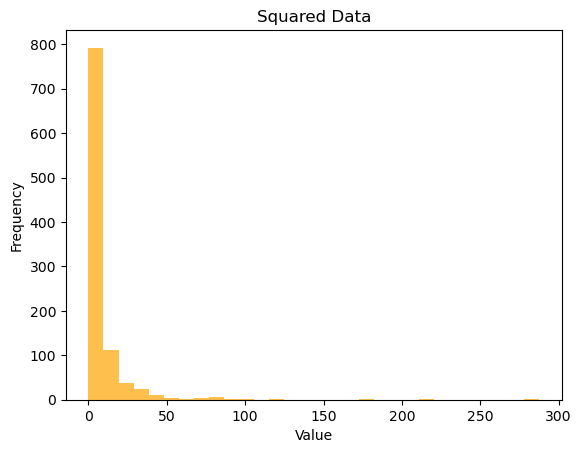

In [2]:
# Squaring the data
squared_data = data ** 2

# Plotting the squared data
plt.hist(squared_data, bins=30, color='orange', alpha=0.7)
plt.title("Squared Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [12]:
import pandas as pd

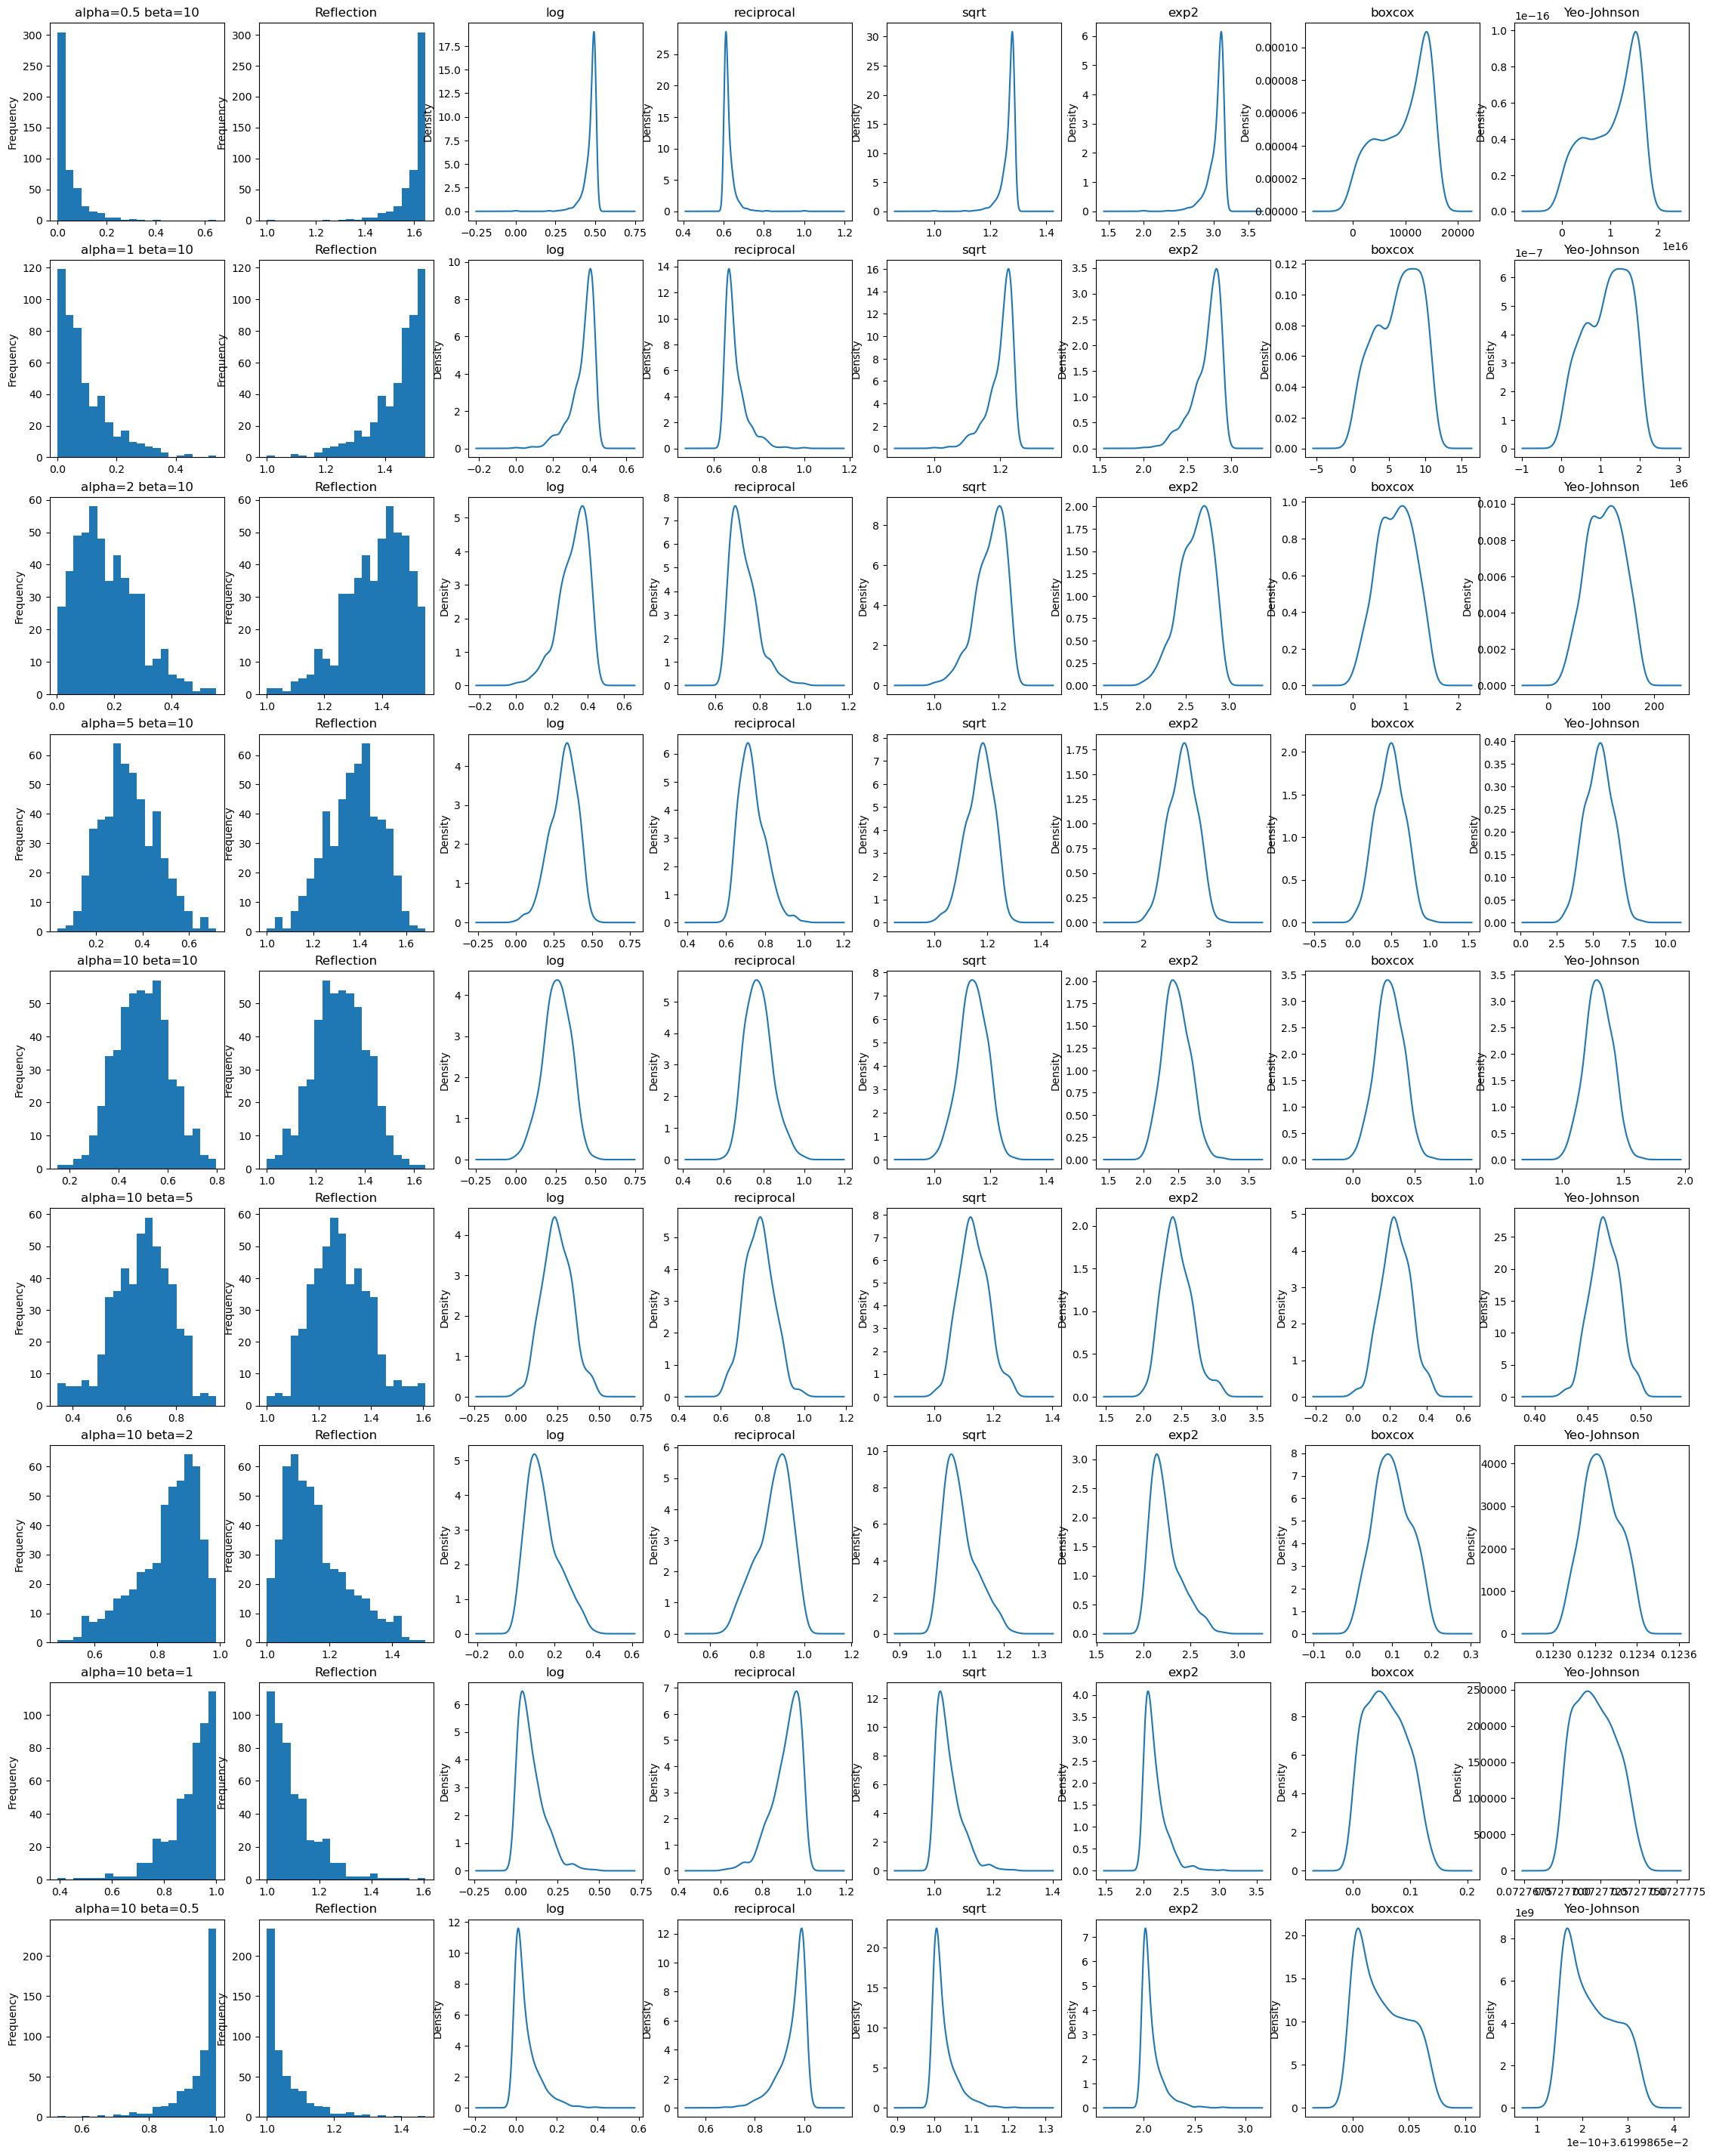

In [33]:
from scipy.stats import boxcox
from scipy.stats import yeojohnson

def reflect(data):
  max_value = np.max(data)
  central_value = max_value + 1
  return central_value - data

config = [(0.5,10),(1,10),(2,10),(5,10),(10,10),(10,5),(10,2),(10,1),(10,0.5)]
fig,axes = plt.subplots(len(config),8,figsize=(28,4*len(config)))

i = 0
j = 0
for a,b in config:
  betaData = np.random.beta(a,b,size=500)

  pd.Series(betaData).plot.hist(bins=20,ax=axes[i,j])
  axes[i,j].set_title(f'alpha={a} beta={b}')
  j += 1

  betaData = reflect(betaData)

  pd.Series(betaData).plot.hist(bins=20,ax=axes[i,j])
  axes[i,j].set_title('Reflection')
  j += 1

  pd.Series(np.log(betaData)).plot.kde(ax=axes[i,j])
  axes[i,j].set_title('log')
  j += 1
  
  pd.Series((1/betaData)).plot.kde(ax=axes[i,j])
  axes[i,j].set_title('reciprocal')
  j += 1

  pd.Series(np.sqrt(betaData)).plot.kde(ax=axes[i,j])
  axes[i,j].set_title('sqrt')
  j += 1

  pd.Series(np.exp2(betaData)).plot.kde(ax=axes[i,j])
  axes[i,j].set_title('exp2')
  j += 1

  pd.Series(boxcox(betaData)[0]).plot.kde(ax=axes[i,j])
  axes[i,j].set_title('boxcox')
  j += 1

  pd.Series(yeojohnson(betaData)[0]).plot.kde(ax=axes[i,j])
  axes[i,j].set_title('Yeo-Johnson')

  if j == 7:
    i += 1
    j = 0
plt.show()


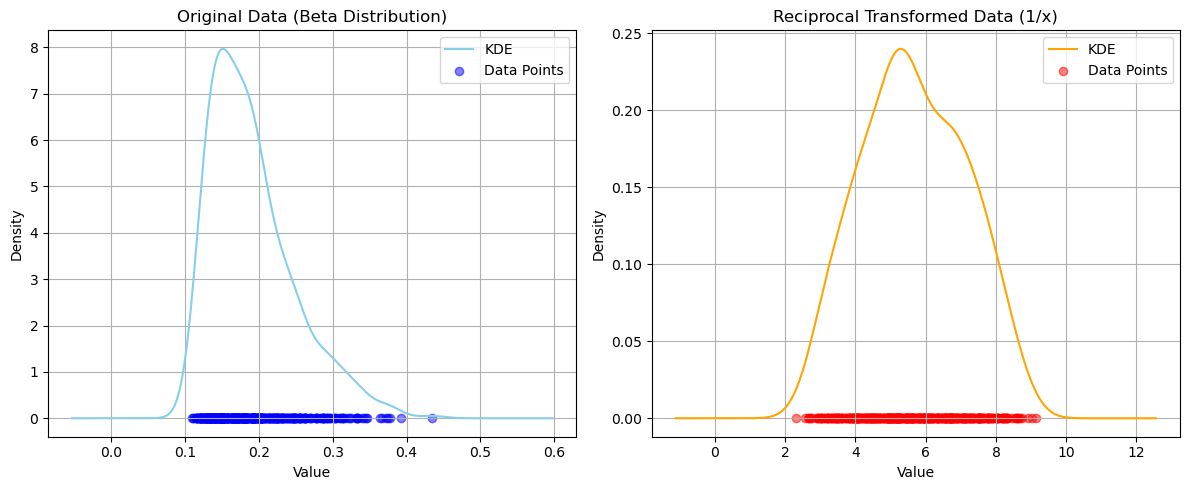

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate sample data (right-skewed beta distribution)
a, b = 2, 20
data = np.random.beta(a, b, size=500)

# Handle zeros to avoid division errors
data = data + abs(np.min(data)) + 0.1  # Ensure all values are positive

# Apply reciprocal transformation
reciprocal_data = 1 / data

# Plot before and after transformation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original data
pd.Series(data).plot.kde(ax=axes[0], color='skyblue', label='KDE')
axes[0].scatter(data, [0] * len(data), color='blue', alpha=0.5, label='Data Points')
axes[0].set_title("Original Data (Beta Distribution)")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")
axes[0].legend()
axes[0].grid()

# Reciprocal transformation
pd.Series(reciprocal_data).plot.kde(ax=axes[1], color='orange', label='KDE')
axes[1].scatter(reciprocal_data, [0] * len(reciprocal_data), color='red', alpha=0.5, label='Data Points')
axes[1].set_title("Reciprocal Transformed Data (1/x)")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Density")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()


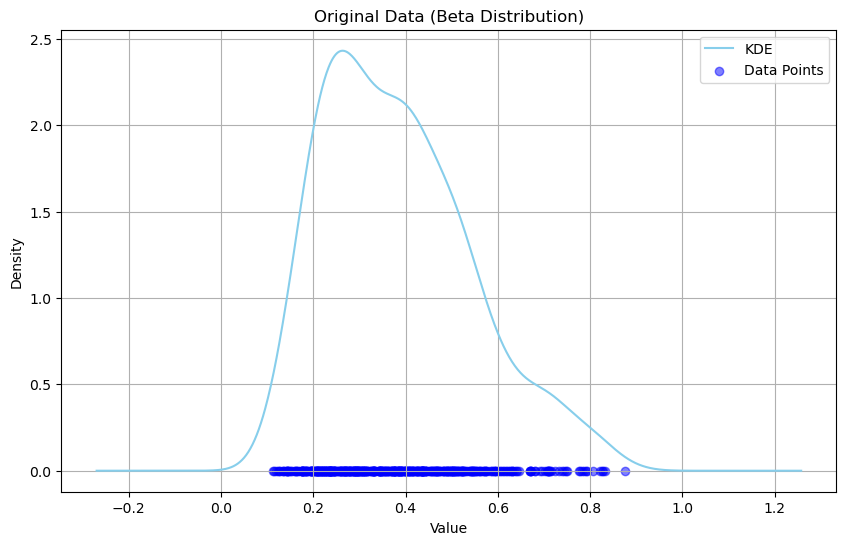

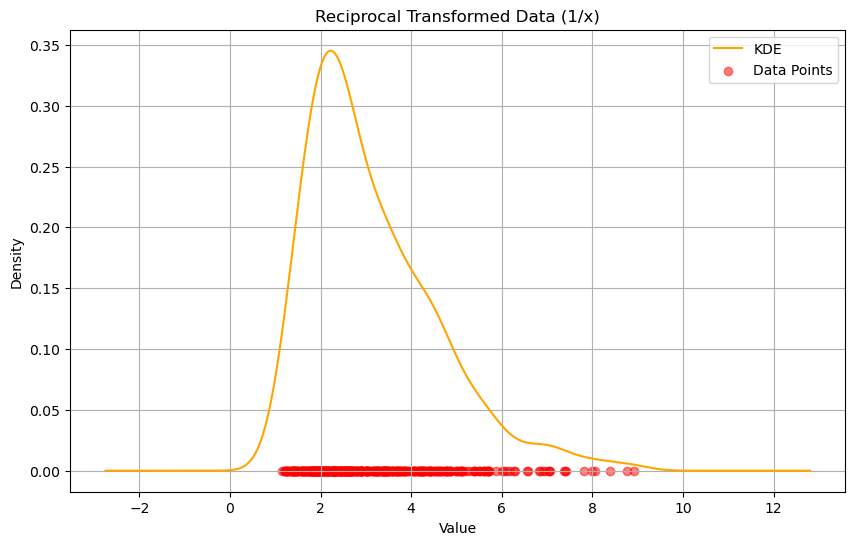

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate sample data (right-skewed beta distribution)
a, b = 2, 5
data = np.random.beta(a, b, size=500)

# Handle zeros to avoid division errors
data = data + abs(np.min(data)) + 0.1  # Ensure all values are positive

# Apply reciprocal transformation
reciprocal_data = 1 / data

# Plot Original Data
plt.figure(figsize=(10, 6))
pd.Series(data).plot.kde(color='skyblue', label='KDE')
plt.scatter(data, [0] * len(data), color='blue', alpha=0.5, label='Data Points')
plt.title("Original Data (Beta Distribution)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

# Plot Reciprocal Transformation
plt.figure(figsize=(10, 6))
pd.Series(reciprocal_data).plot.kde(color='orange', label='KDE')
plt.scatter(reciprocal_data, [0] * len(reciprocal_data), color='red', alpha=0.5, label='Data Points')
plt.title("Reciprocal Transformed Data (1/x)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


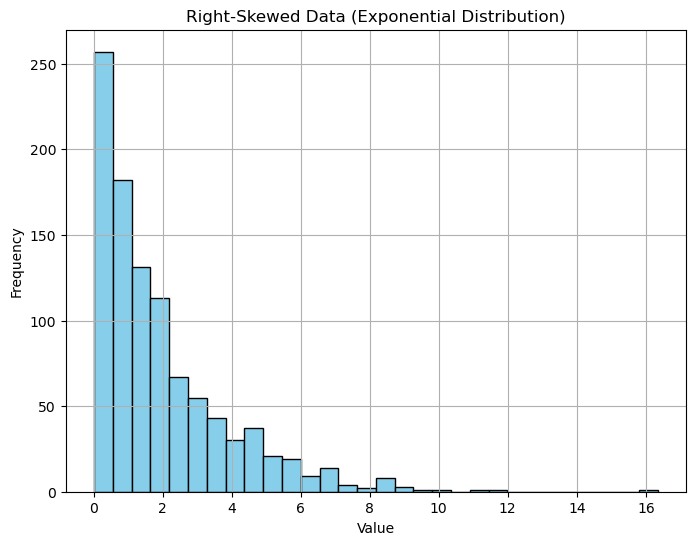

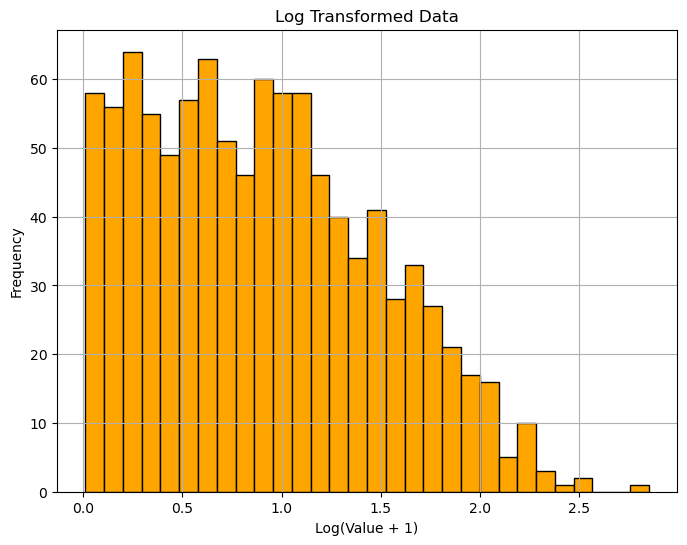

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a right-skewed dataset (Exponential distribution)
np.random.seed(42)
data = np.random.exponential(scale=2, size=1000)  # Exponential distribution

# Visualize the original data
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.title("Right-Skewed Data (Exponential Distribution)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Apply log transformation
log_transformed_data = np.log1p(data)  # log1p is log(1 + x) to handle zero values

# Visualize the log-transformed data
plt.figure(figsize=(8, 6))
plt.hist(log_transformed_data, bins=30, color='orange', edgecolor='black')
plt.title("Log Transformed Data")
plt.xlabel("Log(Value + 1)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


## image

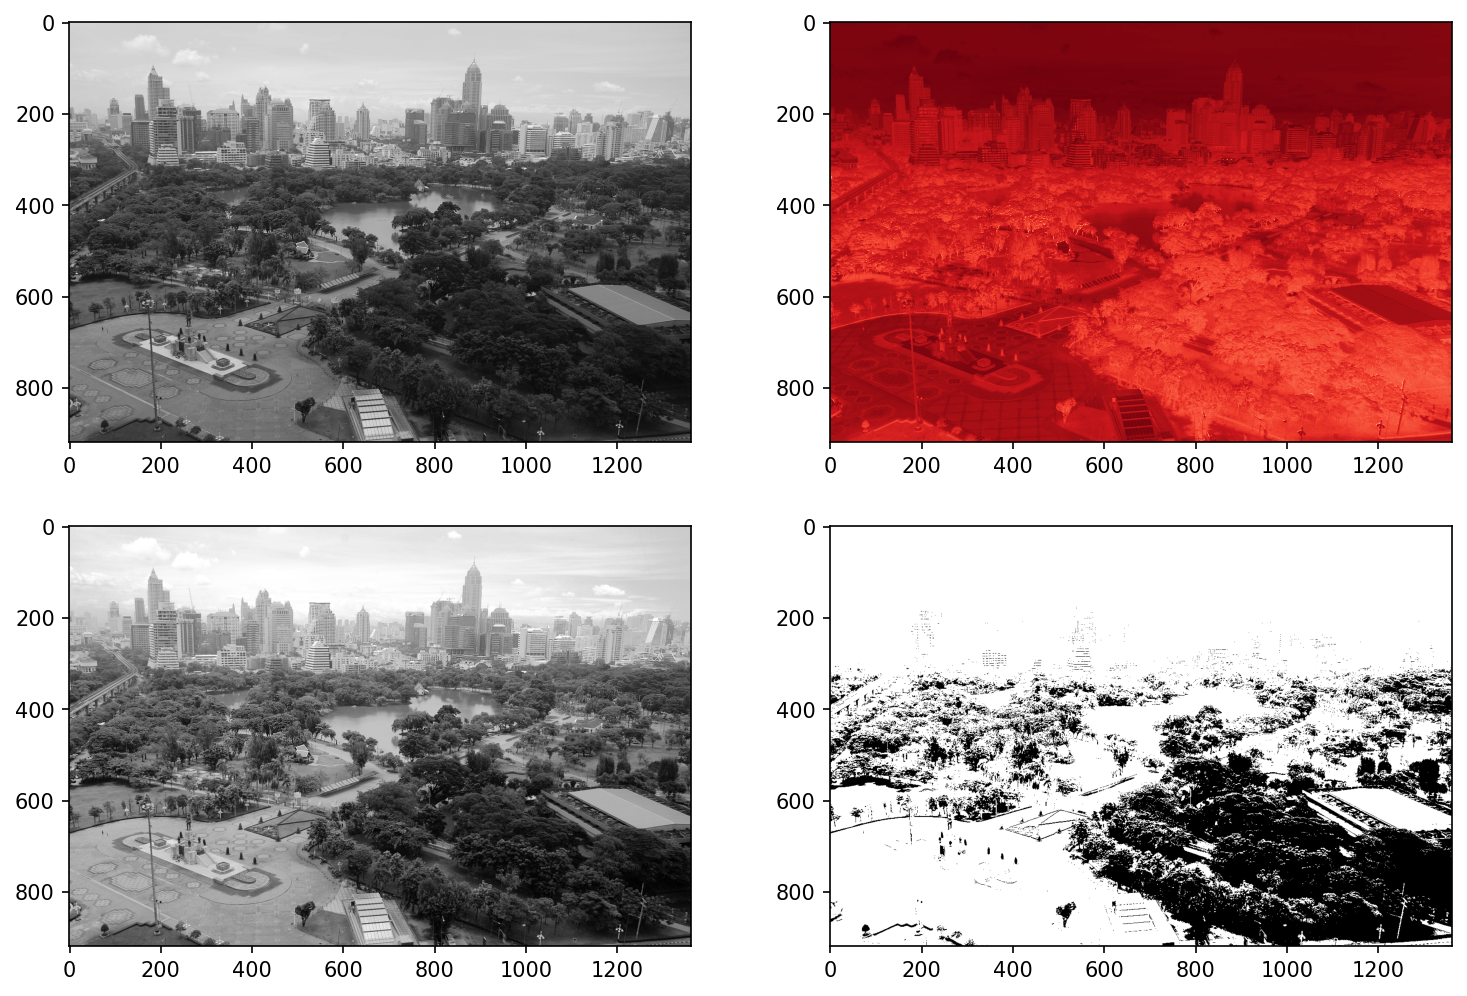

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

img1 = plt.imread('data/lumphini_park.jpg')

rImg = img1[:,:,0]
gImg = img1[:,:,1]
bImg = img1[:,:,2]

grayImg = 0.299*rImg + 0.587*gImg + 0.114*bImg

gammaImg = exposure.adjust_gamma(rImg,gamma=0.2)
eqHistImg = exposure.equalize_hist(grayImg,nbins=40)
sigmoidImg = exposure.adjust_sigmoid(grayImg,cutoff=50)

fig,ax = plt.subplots(2,2,figsize=(12,8),dpi=150) ####

plt.subplot(2,2,1)
plt.imshow(grayImg,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(gammaImg,cmap='Reds')
plt.subplot(2,2,3)
plt.imshow(eqHistImg,cmap='gray')
plt.subplot(2,2,4)
plt.imshow(sigmoidImg,cmap='gray')
plt.show()

In [1]:
import numpy as np
import gc


data_list = [1,2,3,4]
data_array = np.array(data_list)

data_array = data_array/.5
data_array

all_objects = gc.get_objects()

numpy_arrays = [obj for obj in all_objects if isinstance(obj, np.ndarray)]


print(f"Total objects in memory: {len(all_objects)}")
print(f"Number of NumPy arrays: {len(numpy_arrays)}")


Total objects in memory: 89532
Number of NumPy arrays: 2


In [ ]:

data_list = [[10,11,12,13],[20,21,22,23]]
data_array = np.array(data_list)
# print(type(data_array))
# print(data_array.shape)     # (2,4)
# print(data_array[0]) # row 0
# print(data_array[1,0]) # row 1 column 0
# print(data_array[1][0])
# print(data_array)
# print(data_list)

data_list = [[[100,101,102,103],
             [200,201,202,203]],
            [[110,111,112,113],
             [210,211,212,213]],
            [[120,121,122,123],
             [220,221,222,223]]
           ]
data_array = np.array(data_list)
# print(type(data_array))
print(data_array.shape)     # (3,2,4)
# print(data_array[0]) # แผ่น / slide 0
# print(data_array[0,1]) # slide 0, row 1
# print(data_array[0,1,2]) # slide 0, row 1, column 2
print(data_array[:,0,0]) # every slide , row 0 , column 0
print(data_array[0,:,0]) # slide 0, every row, column 0
print(data_array[:,:,0]) # every slide, every row, column 0